# PA 1: Exploratory Analysis over Imdb Movie Review Details

# Student Details

### Team Names and ID:

#### Student Name and ID: Sai Rohith Pasala; 1001873156

#### Student Name and ID: Sri Naga Venkata Pavan Kalyan Sirigibattula; 1001886149

#### Student Name and ID: Rutvik Naga Sai Dondapati; 1001879177


Notes: When submitting, fill your name and ID in this cell. Note that this is a markdown cell! Do not make any changes in the dataset file and do not rename the 'database.csv'. Rename your submission file to 'yourLastName_Last4digitsofyourID_PA1.ipynb' . Do not to forget to cite any external sources used by you.


# Assignment Details
In this assignment, you will conduct a guided exploration over the Federal Emergencies and Disasters dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

# Dataset Details
In this assignment, you will work on imdb movie review ratings dataset. Specifically, you will work on database.csv file from kaggle repository (https://www.kaggle.com/preetviradiya/imdb-movies-ratings-details). The file IMDB_movie_reviews_details.csv contains 841 rows and 10 columns. This dataset begins with the year 1925, and runs up to the year 2021. Each row corresponds to a movie name and its details released all around the world. The columns of the data-set are:

- name - Nme of the movies
- year  -  Yer when it was released
- runtime - Hw many weeks it run succesfully
- genre -   Ctegory of the movie
- rating  -   Oficial Imdb rating of individual movies
- metascore  -  Imdb critic score given by viewers
- timeline   - Movie description explaining the shor storyline of the movie
- votes  -  total votes given by people on movies in Imdb
- gross  -  gross income gained by each movie(Box-office earnings)


## Reading Dataset


#### Note:-
For execution of this file , the dataset 'IMDB_movie_reviews_details.csv' must be in the same folder as this ipynb file

Below code attaches the csv dataset file to R dataframe named as "block"


In [54]:
#importing data from .csv file and storing it in R
block <- read.csv('IMDB_movie_reviews_details.csv', stringsAsFactors = F)
head(block,5)


X,name,year,runtime,genre,rating,metascore,timeline,votes,gross
0,The Shawshank Redemption,1994,142,Drama,9.3,80,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.","2,394,059",$28.34M
1,The Godfather,1972,175,"Crime, Drama",9.2,100,An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his reluctant son.,"1,658,439",$134.97M
2,Soorarai Pottru,2020,153,Drama,9.1,NA,"Nedumaaran Rajangam ""Maara"" sets out to make the common man fly and in the process takes on the world's most capital intensive industry and several enemies who stand in his way.","78,266",
3,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,84,"When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.","2,355,907",$534.86M
4,The Godfather: Part II,1974,202,"Crime, Drama",9.0,90,"The early life and career of Vito Corleone in 1920s New York City is portrayed, while his son, Michael, expands and tightens his grip on the family crime syndicate.","1,152,912",$57.30M



# Preproccesing the Data
- Remove the empty values
- Remove and replace the noisy data/ data i.e, unnecessary data like year is like "|2013" instead of "2013"
- changing the gross income which is starting with $ sign to numeric to make data readable



In [55]:

row.has.na <- apply(block,1,function(x){any(is.na(x))})
cat("Actual empty values in the given dataset\n",sum(row.has.na))

block <- block[!row.has.na,]
row.has.na <- apply(block,1,function(x){any(is.na(x))})
cat("\nTotal Empty values in the dataset after modification\n",sum(row.has.na))
block$gross<-as.numeric(gsub("[M]","",gsub("[$]","",block$gross)))

#During our initial observation we have found out ther is noisy data like year is"|1995" instead of "1995" ,so we are modifiying it.
bad_yrs <- list("I 1995", "I 2014", "I 2013","I 2020","I 2004","II 2016","I 2015","I 2010","I 2008","I 2007","I 1985","III 2018"
              ,"II 2015","I 2016","I 2017","I 2011","I 2007","I 2004","I 2001")
block[block=="I 1995"] <- "1995"
block[block=="I 2014"] <- "2014"
block[block=="I 2013"] <- "2013"
block[block=="I 2020"] <- "2020"
block[block=="II 2016"] <- "2016"
block[block=="I 2015"] <- "2015"
block[block=="I 2010"] <- "2010"
block[block=="I 2008"] <- "2008"
block[block=="I 1985"] <- "1985"
block[block=="III 2018"] <- "2018"
block[block=="II 2015"] <- "2015"
block[block=="I 2016"] <- "2016"
block[block=="I 2017"] <- "2017"
block[block=="I 2011"] <- "2011"
block[block=="I 2007"] <- "2007"
block[block=="I 2004"] <- "2004"

block[block=="I 2001"] <- "2001"


#changing the gross income which is starting with $ sign to numeric to make data readable,We replace them with 0.
block$gross[is.na(block$gross)]=0





Actual empty values in the given dataset
 159
Total Empty values in the dataset after modification
 0


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.



In [56]:
#For each task below, look for a R function to do the task.
#Replace None in each task with your code.

# 2.5 points
#Task 1-a: Find the number of rows and columns in the block data frame.

details<-dim(block)  # Syntax to display details of data frame to give count of row and columns
cat("\n-->Task 1-a: Number of rows and columns  of block data frame are: \n",details)


# 2.5 points
#Task 1-b: Find and print the descriptive detail of (count, min,max,avg,mean,top,freq etc) for given dataset 
details<-summary(block)     #Syntax to display details of data frame as a summary
cat("\n-->Task 1-b: Descriptive details of the dataset are\n")
details


# 10 points
#Task 1-c: Print ALL the unique values of Movies,years and genre columns.

unique(block$name)
unique(block$year)
unique(block$genre)


-->Task 1-a: Number of rows and columns  of block data frame are: 
 841 10
-->Task 1-b: Descriptive details of the dataset are


       X             name               year              runtime     
 Min.   :  0.0   Length:841         Length:841         Min.   : 64.0  
 1st Qu.:279.0   Class :character   Class :character   1st Qu.:103.0  
 Median :537.0   Mode  :character   Mode  :character   Median :119.0  
 Mean   :524.7                                         Mean   :122.5  
 3rd Qu.:777.0                                         3rd Qu.:135.0  
 Max.   :999.0                                         Max.   :321.0  
    genre               rating        metascore        timeline        
 Length:841         Min.   :7.600   Min.   : 28.00   Length:841        
 Class :character   1st Qu.:7.700   1st Qu.: 71.00   Class :character  
 Mode  :character   Median :7.900   Median : 79.00   Mode  :character  
                    Mean   :7.936   Mean   : 78.16                     
                    3rd Qu.:8.100   3rd Qu.: 87.00                     
                    Max.   :9.300   Max.   :100.00                     

[1] "The Shawshank Redemption"                                            
  [2] "The Godfather"                                                       
  [3] "The Dark Knight"                                                     
  [4] "The Godfather: Part II"                                              
  [5] "12 Angry Men"                                                        
  [6] "The Lord of the Rings: The Return of the King"                       
  [7] "Pulp Fiction"                                                        
  [8] "Schindler's List"                                                    
  [9] "Inception"                                                           
 [10] "Fight Club"                                                          
 [11] "The Lord of the Rings: The Fellowship of the Ring"                   
 [12] "Forrest Gump"                                                        
 [13] "The Good, the Bad and the Ugly"                                      
 [14] "The Lord of the Rings: The Two Towers"                               
 [15] "The Matrix"                                                          
 [16] "Goodfellas"                                                          
 [17] "Star Wars: Episode V - The Empire Strikes Back"                      
 [18] "One Flew Over the Cuckoo's Nest"                                     
 [19] "Parasite"                                                            
 [20] "Interstellar"                                                        
 [21] "City of God"                                                         
 [22] "Spirited Away"                                                       
 [23] "Saving Private Ryan"                                                 
 [24] "The Green Mile"                                                      
 [25] "Life Is Beautiful"                                                   
 [26] "Se7en"                                                               
 [27] "The Silence of the Lambs"                                            
 [28] "Star Wars: Episode IV - A New Hope"                                  
 [29] "Hara-Kiri"                                                           
 [30] "Seven Samurai"                                                       
 [31] "It's a Wonderful Life"                                               
 [32] "Hamilton"                                                            
 [33] "Whiplash"                                                            
 [34] "The Intouchables"                                                    
 [35] "The Prestige"                                                        
 [36] "The Departed"                                                        
 [37] "The Pianist"                                                         
 [38] "Gladiator"                                                           
 [39] "American History X"                                                  
 [40] "The Usual Suspects"                                                  
 [41] "LÃ©on: The Professional"                                             
 [42] "The Lion King"                                                       
 [43] "Terminator 2: Judgment Day"                                          
 [44] "Cinema Paradiso"                                                     
 [45] "Grave of the Fireflies"                                              
 [46] "Back to the Future"                                                  
 [47] "Once Upon a Time in the West"                                        
 [48] "Psycho"                                                              
 [49] "Rear Window"                                                         
 [50] "Casablanca"                                                          
 [51] "Modern Times"                                                        
 [52] "City Lights"                                                        

[1] "1994" "1972" "2008" "1974" "1957" "2003" "1993" "2010" "1999" "2001"
[11] "1966" "2002" "1990" "1980" "1975" "2019" "2014" "1998" "1997" "1995"
[21] "1991" "1977" "1962" "1954" "1946" "2020" "2011" "2006" "2000" "1988"
[31] "1985" "1968" "1960" "1942" "1936" "1931" "2018" "2016" "2017" "2012"
[41] "2009" "1981" "1979" "1964" "2004" "1992" "1987" "1986" "1984" "1983"
[51] "1976" "1973" "1971" "1959" "1958" "1952" "1944" "1941" "1927" "2013"
[61] "2021" "2007" "2005" "1989" "1965" "1963" "1961" "1950" "1948" "2015"
[71] "1996" "1982" "1978" "1967" "1955" "1953" "1951" "1949" "1940" "1939"
[81] "1934" "1930" "1928" "1970" "1969" "1956" "1945" "1925" "1947" "1938"
[91] "1933" "1932" "1943" "1935"

[1] "Drama"                         "Crime, Drama"                 
  [3] "Action, Crime, Drama"          "Action, Adventure, Drama"     
  [5] "Biography, Drama, History"     "Action, Adventure, Sci-Fi"    
  [7] "Drama, Romance"                "Western"                      
  [9] "Action, Sci-Fi"                "Biography, Crime, Drama"      
 [11] "Action, Adventure, Fantasy"    "Comedy, Drama, Thriller"      
 [13] "Adventure, Drama, Sci-Fi"      "Animation, Adventure, Family" 
 [15] "Drama, War"                    "Crime, Drama, Fantasy"        
 [17] "Comedy, Drama, Romance"        "Crime, Drama, Mystery"        
 [19] "Crime, Drama, Thriller"        "Action, Drama, Mystery"       
 [21] "Drama, Family, Fantasy"        "Drama, Music"                 
 [23] "Biography, Comedy, Drama"      "Drama, Mystery, Sci-Fi"       
 [25] "Biography, Drama, Music"       "Crime, Mystery, Thriller"     
 [27] "Animation, Adventure, Drama"   "Animation, Drama, War"        
 [29] "Adventure, Comedy, Sci-Fi"     "Horror, Mystery, Thriller"    
 [31] "Mystery, Thriller"             "Drama, Romance, War"          
 [33] "Comedy, Drama, Family"         "Animation, Drama, Fantasy"    
 [35] "Animation, Action, Adventure"  "Drama, Western"               
 [37] "Action, Adventure"             "Comedy, Drama"                
 [39] "Drama, Mystery, Thriller"      "Drama, Horror"                
 [41] "Drama, Mystery, War"           "Horror, Sci-Fi"               
 [43] "Comedy"                        "Drama, Thriller, War"         
 [45] "Adventure, Drama, War"         "Drama, Romance, Sci-Fi"       
 [47] "Comedy, Romance"               "Comedy, Crime"                
 [49] "Drama, Family, Sport"          "Animation, Adventure, Comedy" 
 [51] "Adventure, Drama, Thriller"    "Comedy, Crime, Drama"         
 [53] "Crime, Drama, Sci-Fi"          "Adventure, Sci-Fi"            
 [55] "Adventure, Biography, Drama"   "Adventure, Mystery, Thriller" 
 [57] "Mystery, Romance, Thriller"    "Comedy, Musical, Romance"     
 [59] "Crime, Drama, Film-Noir"       "Drama, Mystery"               
 [61] "Drama, Sci-Fi"                 "Animation, Drama, Family"     
 [63] "Action, Comedy, Crime"         "Drama, Mystery, Romance"      
 [65] "Drama, Fantasy, War"           "Biography, Drama"             
 [67] "Animation, Family, Fantasy"    "Action, Thriller"             
 [69] "Action, Drama, War"            "Biography, Drama, Sport"      
 [71] "Adventure, Comedy, Fantasy"    "Adventure, Drama, History"    
 [73] "Comedy, Music, Romance"        "Drama, Fantasy, History"      
 [75] "Crime, Thriller"               "Adventure, Drama, Western"    
 [77] "Comedy, Romance, War"          "Drama, Romance, Thriller"     
 [79] "Action, Drama, Sci-Fi"         "Drama, Thriller"              
 [81] "Adventure, Comedy, Crime"      "Action, Biography, Drama"     
 [83] "Action, Drama, Sport"          "Adventure, Drama, Fantasy"    
 [85] "Drama, Sport"                  "Drama, Musical, Sport"        
 [87] "Drama, Music, Romance"         "Comedy, Crime, Romance"       
 [89] "Comedy, Crime, Sport"          "Adventure, Family, Fantasy"   
 [91] "Adventure, Drama"              "Animation, Adventure, Fantasy"
 [93] "Horror, Mystery, Sci-Fi"       "Action, Sci-Fi, Thriller"     
 [95] "Drama, Horror, Thriller"       "Drama, Film-Noir"             
 [97] "Film-Noir, Mystery, Thriller"  "Drama, History"               
 [99] "Drama, History, Romance"       "Comedy, Drama, Music"         
[101] "Drama, Family"                 "Action, Crime, Thriller"      
[103] "Biography, Drama, Thriller"    "Action, Adventure, Comedy"    
[105] "Animation, Biography, Drama"   "Action, Mystery, Thriller"    
[107] "Crime, Drama, Romance"         "Action, Adventure, Thriller"  
[109] "Crime, Drama, Musical"         "Mystery, Sci-Fi, Thriller"    
[111] "Animation, Action, Crime"      "Comedy, Fantasy, Romance"     
[113] "Drama, History, Thriller"      "Drama, Fantasy, Romance"      
[115] "Drama



# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop.



In [64]:

# 8 points
#Task 2-a: Ascertain the highest gross money achieved by movie every year.
cat("\n-->Task 2-a:Highest grosseed movie every year is listed below\n")

aggregate(block$gross, by = list("Year Released"=block$year,"Movie Name"=block$name),max)




#Task 2-b:Rank all the movies based on rating in a year where minimum number of movies are released and maximum number of movies released.
cat("\n>-Task 2-b:Listed below are movies ordered according to their ratings in the year that LEAST movies are released \n")
un <- unique(block$year)
mini_year<-uniqv[which.min(tabulate(match(block$year, un)))]
cat("\n MINIMUM number of movies are",mini_year)
cat("\n")
ndata <- subset(block, year == mini_year)
rkeddata <-ndata[order(ndata$rating),]
rkeddata

cat("\n>-Task 2-b:Listed below are movies ordered according to their ratings in the year that MOST movies are released \n")
un <- unique(block$year)
maxi_year<-uniqv[which.max(tabulate(match(block$year, un)))]
cat("\n MAXIMUM number of movies are",maxi_year)
cat("\n")
ndata <- subset(block, year == maxi_year)
rkeddata <-ndata[order(ndata$rating)
rkeddata



-->Task 2-a:Highest grosseed movie every year is listed below


Year Released,Movie Name,x
1957,12 Angry Men,4.36
1995,12 Monkeys,57.14
2013,12 Years a Slave,56.67
2019,1917,159.23
1968,2001: A Space Odyssey,56.95
2003,21 Grams,16.29
2002,25th Hour,13.06
2004,3-Iron,0.24
2009,3 Idiots,6.53
2007,3:10 to Yuma,53.61



>-Task 2-b:Listed below are movies ordered according to their ratings in the year that LEAST movies are released 

 MINIMUM number of movies are 1936


,X,name,year,runtime,genre,rating,metascore,timeline,votes,gross
53,52,Modern Times,1936,87,"Comedy, Drama, Family",8.5,96,The Tramp struggles to live in modern industrial society with the help of a young homeless woman.,"222,623",0.16



>-Task 2-b:Listed below are movies ordered according to their ratings in the year that MOST movies are released 

 MAXIMUM number of movies are 2004


,X,name,year,runtime,genre,rating,metascore,timeline,votes,gross
936,935,Dead Man's Shoes,2004,90,"Crime, Drama, Thriller",7.6,52,A disaffected soldier returns to his hometown to get even with the thugs who brutalized his mentally-challenged brother years ago.,"50,391",0.01
942,941,Saw,2004,103,"Horror, Mystery, Thriller",7.6,46,"Two strangers awaken in a room with no recollection of how they got there, and soon discover they're pawns in a deadly game perpetrated by a notorious serial killer.","385,527",56.00
943,942,Mysterious Skin,2004,105,Drama,7.6,73,"A teenage hustler and a young man obsessed with alien abductions cross paths, together discovering a horrible, liberating truth.","66,527",0.70
944,943,A Very Long Engagement,2004,133,"Drama, Mystery, Romance",7.6,76,"Tells the story of a young woman's relentless search for her fiancÃ©, who has disappeared from the trenches of the Somme during World War One.","71,418",6.17
949,948,The Butterfly Effect,2004,113,"Drama, Sci-Fi, Thriller",7.6,30,"Evan Treborn suffers blackouts during significant events of his life. As he grows up, he finds a way to remember these lost memories and a supernatural way to alter his life by reading his journal.","456,921",57.94
781,780,Crash,2004,112,"Crime, Drama, Thriller",7.7,66,"Los Angeles citizens with vastly separate lives collide in interweaving stories of race, loss and redemption.","423,089",54.58
782,781,Kung Fu Hustle,2004,99,"Action, Comedy, Fantasy",7.7,78,"In Shanghai, China in the 1940s, a wannabe gangster aspires to join the notorious ""Axe Gang"" while residents of a housing complex exhibit extraordinary powers in defending their turf.","129,411",17.11
783,782,The Bourne Supremacy,2004,108,"Action, Mystery, Thriller",7.7,73,"When Jason Bourne is framed for a CIA operation gone awry, he is forced to resume his former life as a trained assassin to survive.","439,942",176.24
784,783,The Machinist,2004,101,"Drama, Thriller",7.7,61,An industrial worker who hasn't slept in a year begins to doubt his own sanity.,"363,703",1.08
785,784,Ray,2004,152,"Biography, Drama, Music",7.7,73,"The story of the life and career of the legendary rhythm and blues musician Ray Charles, from his humble beginnings in the South, where he went blind at age seven, to his meteoric rise to stardom during the 1950s and 1960s.","140,336",75.33




# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. Feel free to experiment with them and choose the one you like.We can use different libraries like ggplot and tidyverse or use the Default R inbuilt statistical graphs syntax. We have earmarked 10 points for the aesthetics of your visualizations.



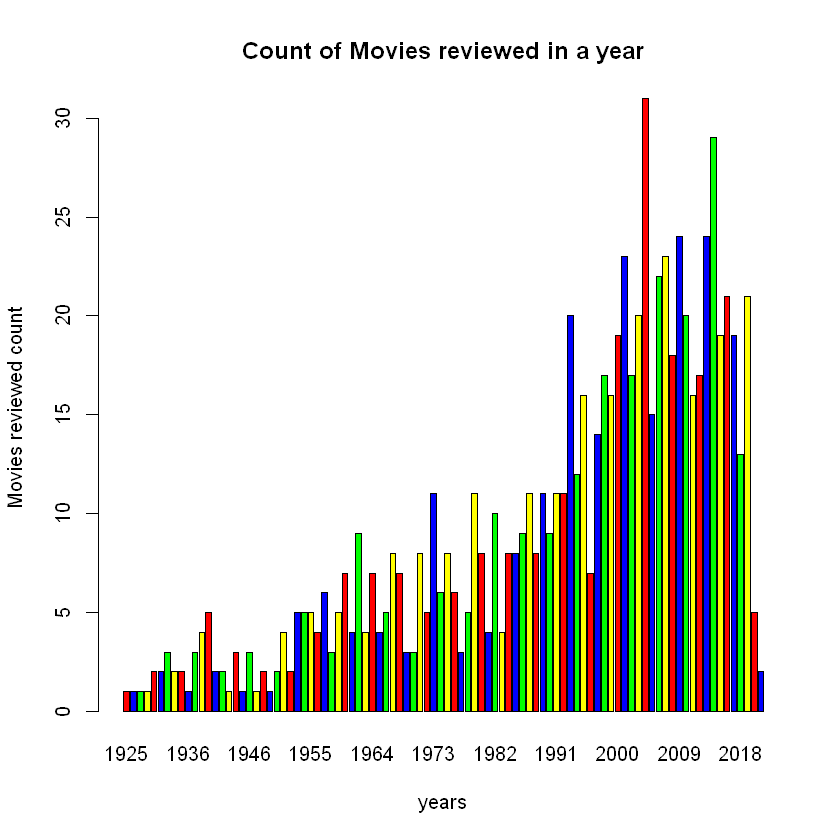

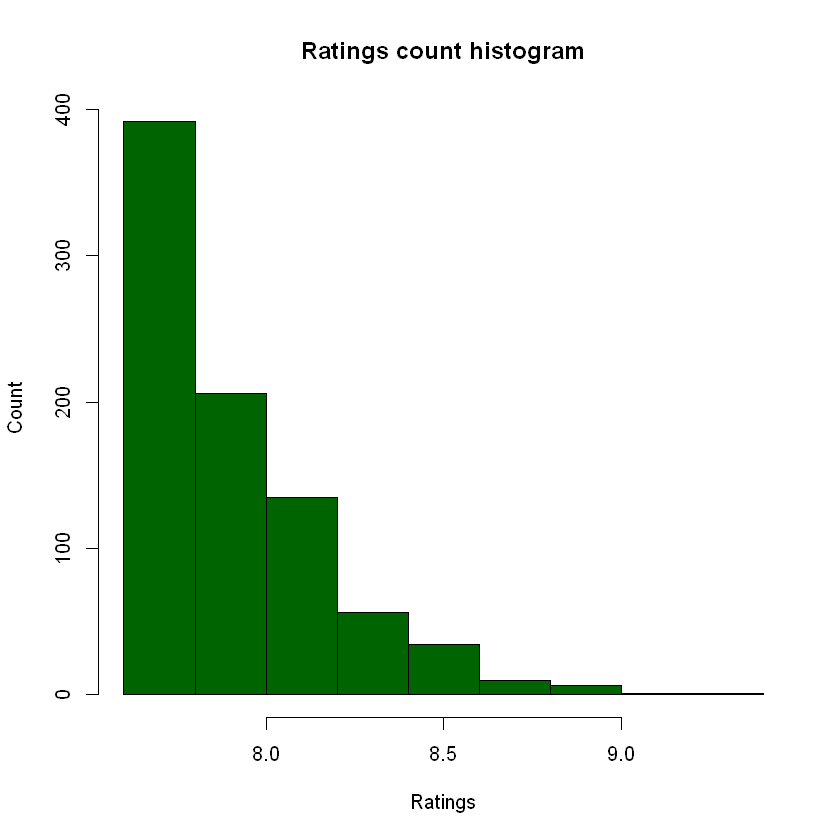

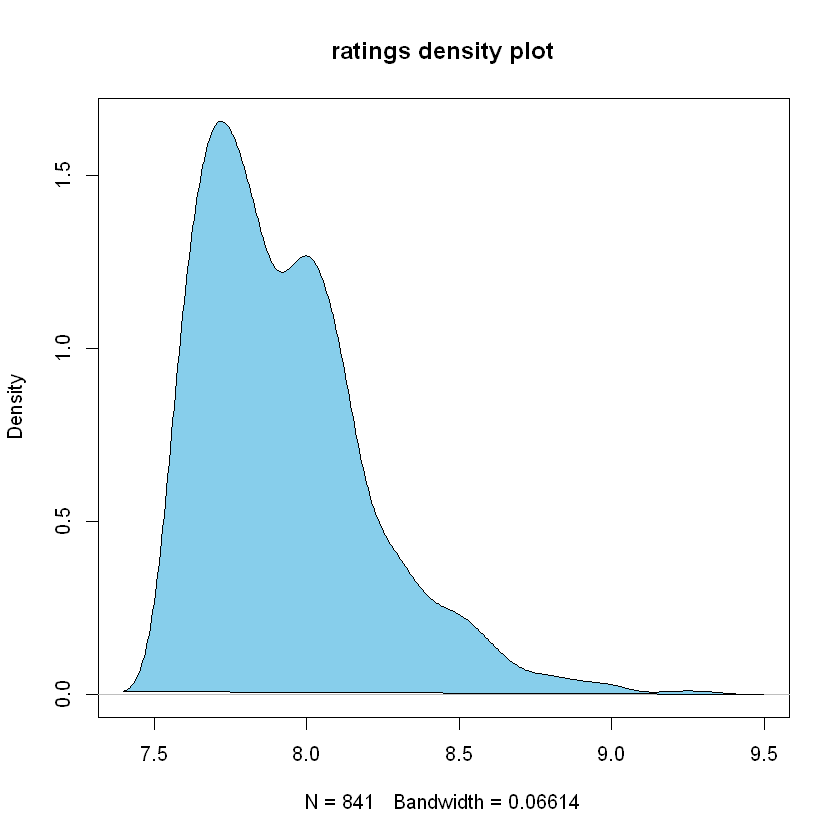

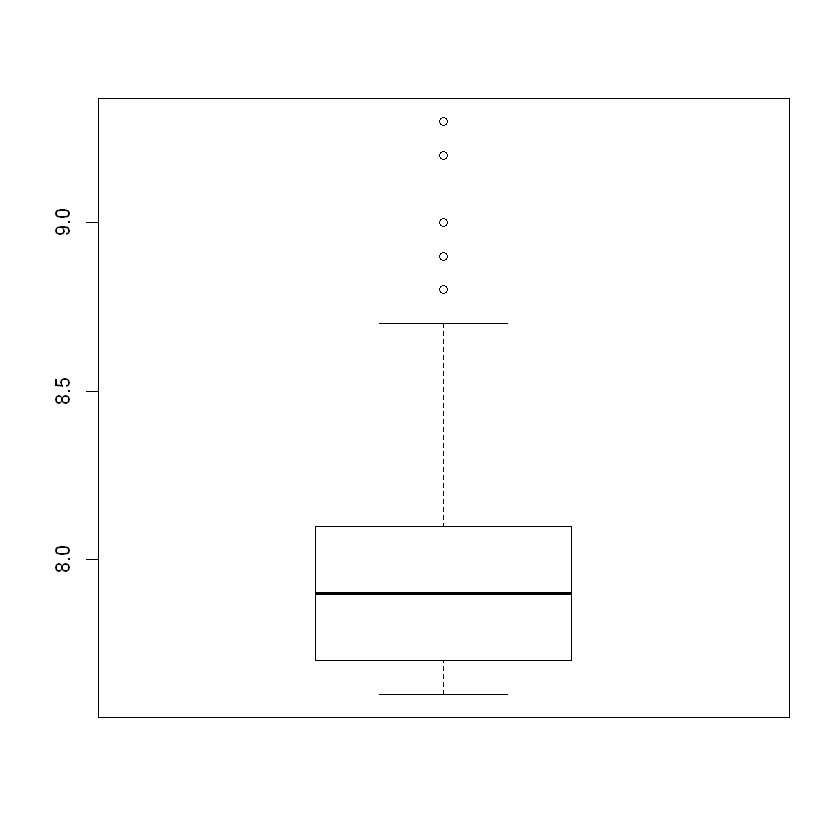

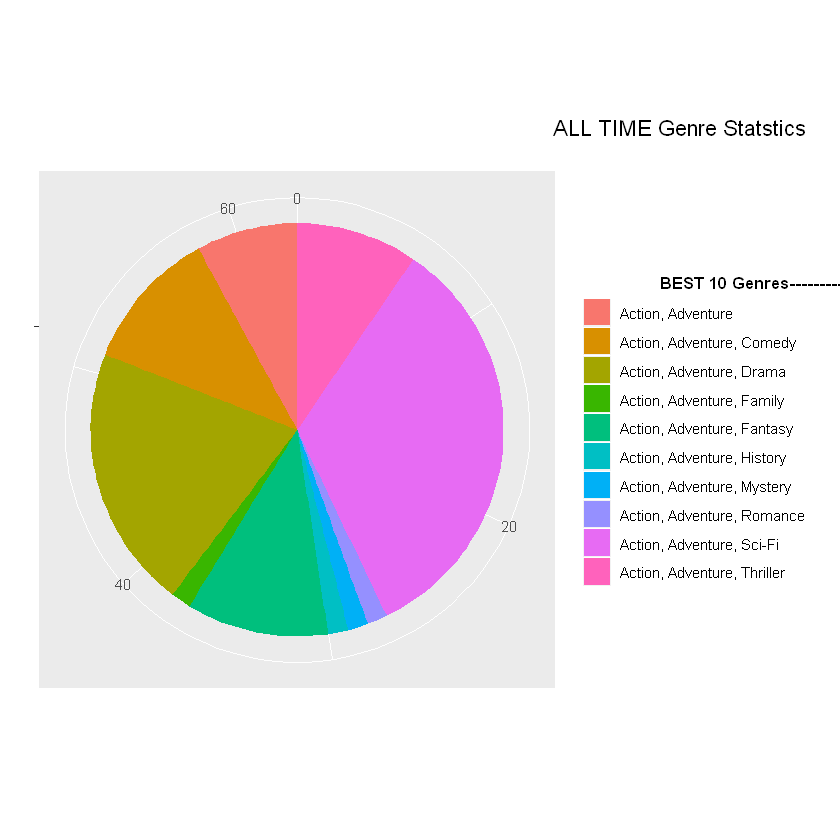

In [2]:


# Task 3-a: Design a graph to plot the number of reviews of for each year  . 
# Try to diplay the number of movies reviewed every year over a bar chart.
# Try to make the bar chart into a vertical bar chart
#-----------------------------------begin code for Task 3-a------------------------------------------

ycal <- table(block$year)
barplot(ycal,main="Count of Movies reviewed in a year",col=c("red","blue","green","yellow"), xlab="years", 
        ylab="Movies reviewed count"
)  #syntax for R code to print bar chart graph
#----------------------------------end code for Task 3-a------------------------------------------------------



#Task 3-b Design some histogram,boxplot etc., graphs with ratings variable in given dataset

hist(block$rating,breaks=8,col="darkgreen",xlab="Ratings", ylab="Count", main="Ratings count histogram") #Histogram syntax


den_data<-density(block$rating)  # syntax to display density type graph storing it in temp data den_data

plot(den_data,main="ratings density plot")    #density grph plot syntax
polygon(den_data,col="skyblue",border="black")   #fillling colors in density graph


boxplot(block$rating)  #box plot graph syntax




#-------------------------begin code for Task 3-b -------------------------------------------------------------
# Task 3-c: Design a pie chart that has top-10 highly watched movies genre for all years.
# Load ggplot2


library(tidyverse)

freak<-as.data.frame(table(block$genre, useNA='always')) #storing data in another varibale to specify one variable
colnames(freak)<-c("Genr","Cnnt")
freak<-freak %>% slice(1:10)      #slicing the data to save and plot


pi=ggplot(freak, aes(x = "", y = Cnnt, fill = Genr))

pi= pi+     geom_bar(width = 1, stat = "id") 
 pi= pi+    coord_polar(theta = "y", start = 0) 
      
   pi= pi+  labs(x = "", y = "", title = "__ALL TIME Genr Statstics__\n",
         fill = "\n_BEST 10 Genres----------- \n")
   pi= pi+  theme(plot.title = element_text(hjust = 2,color="blue"),
           legend.title = element_text(hjust = 2,face="bold", size = 10))
pi
#---------------------------end code for Task 3-c-----------------------------



## Find out a special pattern with dataset you have been given

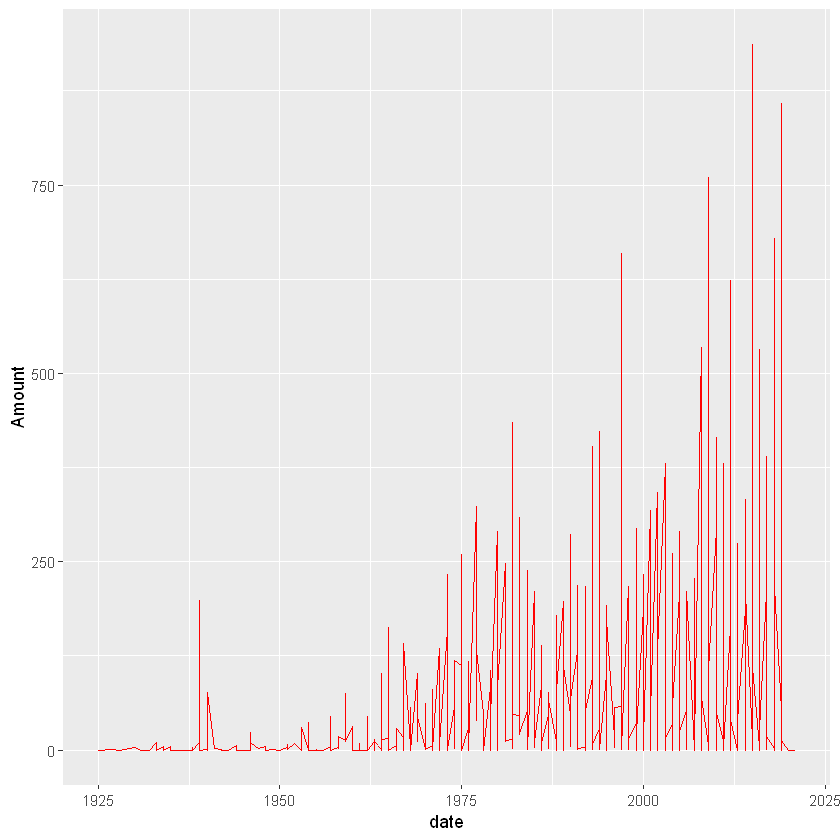

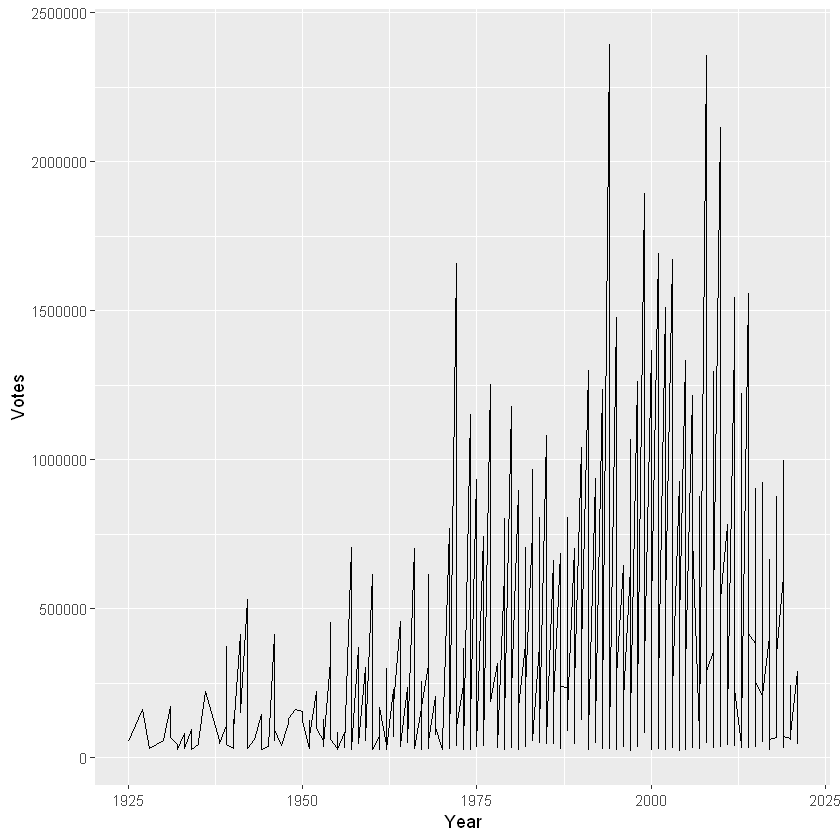

In [84]:
# plotting a special pattern
block$vtes<-as.numeric(gsub("[,]","",block$vtes))
block$year<-as.numeric(gsub("[[:space:]]","",gsub("[I]","",block$year)))

library(ggplot2)
library(tidyr)

t_dat <-          #storing date and gros into t_dat
  data.frame(
    vari0 = block$gross,
    datess = block$year
  ) 
t_dat %>%                            #plotting stored
    gather(key,Amount, var1) %>%
    ggplot(aes(x=date, y=Amount,var1)) +
    geom_line(    color="red"
)
t_dat <-             #storing votes and year into t_dat
  data.frame(
    var0 = block$vtes,
    Yrs = block$year
  )
t_dat %>%
    gather(Key,Vtes, var1) %>%      #plotting stored
    ggplot(aes(x=Yrs, y=Votes, Legend="Vtes")) +
    geom_line(color="black")



## Report

1. After investigating and analyzing the data, we discovered that the Gross value gained by movies and the year which movies are released are correlative.

2. we also discovered that the number of votes cast and the amount of votes collected by the films are highly correlated.

3. We can clearly see that when the number of votes cast is low, the amount collected is low as well. 

4. when the Gross income for movies is highest ,number of votes is highest and the rating is also highestin within that year.
